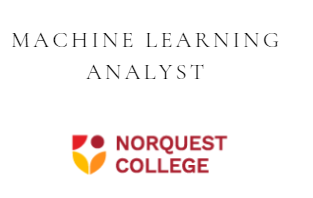



**Objective:**  
In this assignment, you will use the **Machine Learning notebook** from last year's project as a starting point. Your goal is to retrain the model using the **2023 Food Drive data** for training and then use the **2024 Food Drive data** as the test set to evaluate the model’s accuracy and effectiveness. You will compare the predictions with the actual results from 2024 and assess the model's performance.

---






# Load data and run previous EDA

# Modelling

Predicting the **number of donation bags collected** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

# Solution 1: Donation Prediction


In [ ]:
# Create a feature matrix X and target variable y
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data_2023 = pd.read_csv("cleaned_data_2023.csv")
data_2024 = pd.read_csv("cleaned_data_2024.csv")
X = data_2023[['Completed More Than One Route','Routes Completed','Time Spent', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers','Ward/Branch']]
y = data_2023['Donation Bags Collected']


In [ ]:
# Display column names to understand differences
print("Columns in 2023 data:", data_2023.columns.tolist())
print("Columns in 2024 data:", data_2024.columns.tolist())

Columns in 2023 data: ['Date', 'Location', 'Stake', '# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Completed More Than One Route', 'Ward/Branch', 'Comments', 'Routes Completed', 'Doors in Route', 'time completed', 'Time Spent']
Columns in 2024 data: ['How did you receive the form?', 'Drop Off Location', 'Stake', 'Route Number/Name', 'Time to Complete (min)', 'No of Adult Volunteers', 'No of Youth Volunteers', 'Doors in Route', 'Donation Bags Collected', 'Completed More Than One Route', 'How many routes did you complete?', 'Additional Routes completed (2 routes)', 'Additional routes completed (3 routes)', 'Additional routes completed (3 routes)2', 'Additional routes completed (More than 3 Routes)', 'Additional routes completed (More than 3 Routes)2', 'Additional routes completed (More than 3 Routes)3', 'Comments or Feedback', 'Ward']


In [ ]:
# Standardize column names across both datasets to align features with the 2023 dataset's naming convention
rename_2024 = {
    'No of Adult Volunteers': '# of Adult Volunteers',
    'No of Youth Volunteers': '# of Youth Volunteers',
    'Time to Complete (min)': 'Time Spent',
    'How many routes did you complete?': 'Routes Completed',
    'Ward': 'Ward/Branch'
}

data_2024.rename(columns=rename_2024, inplace=True)


In [ ]:
# Define function to convert numeric time spent to range labels for 2023 data
def convert_to_range(value):
    if value <= 30:
        return "0 - 30 Minutes"
    elif 30 < value <= 60:
        return "30 - 60 Minutes"
    elif 60 < value <= 90:
        return "1 Hour - 1.5 Hours"
    else:
        return "2+ Hours"

# Apply the function to convert 'Time Spent' in the 2023 dataset
data_2023['Time Spent'] = data_2023['Time Spent'].apply(convert_to_range)

# Verify change in 2023 data
print("Updated 'Time Spent' in 2023 data:\n", data_2023['Time Spent'].head())

# Ensuring 2024 data 'Time Spent' is also in the same range format (already mapped as per previous steps)
# Display sample to confirm consistency
print("Updated 'Time Spent' in 2024 data:\n", data_2024['Time Spent'].head())

Updated 'Time Spent' in 2023 data:
 0    0 - 30 Minutes
1    0 - 30 Minutes
2    0 - 30 Minutes
3    0 - 30 Minutes
4    0 - 30 Minutes
Name: Time Spent, dtype: object
Updated 'Time Spent' in 2024 data:
 0     0 - 30 Minutes
1     0 - 30 Minutes
2     0 - 30 Minutes
3     0 - 30 Minutes
4    30 - 60 Minutes
Name: Time Spent, dtype: object


In [ ]:
data_2023.isna().sum()


,0
Date,1
Location,0
Stake,0
# of Adult Volunteers,0
# of Youth Volunteers,0
Donation Bags Collected,0
Completed More Than One Route,0
Ward/Branch,2
Comments,340
Routes Completed,0


In [ ]:
data_2023.head()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Completed More Than One Route,Ward/Branch,Comments,Routes Completed,Doors in Route,time completed,Time Spent
0,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1,3,14,0,Clareview Ward,NaN,2,14,25.0,0 - 30 Minutes
1,2023-09-23 10:36:52,Gateway Stake Centre,Gateway Stake,3,1,18,1,Crawford Plains Ward,NaN,2,144,30.0,0 - 30 Minutes
2,2023-09-23 10:40:22,Gateway Stake Centre,Gateway Stake,2,0,20,0,Silver Berry Ward,NaN,2,186,30.0,0 - 30 Minutes
3,2023-09-23 10:41:08,Gateway Stake Centre,Gateway Stake,2,0,20,1,Crawford Plains Ward,NaN,1,194,30.0,0 - 30 Minutes
4,2023-09-23 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1,0,2,0,Londonderry Ward,NaN,2,1,10.0,0 - 30 Minutes


In [ ]:
data_2023.tail()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Completed More Than One Route,Ward/Branch,Comments,Routes Completed,Doors in Route,time completed,Time Spent
449,2023-09-27 14:24:33,North Stake Centre,Edmonton North Stake,2,0,20,0,Namao Ward,NaN,2,150,45.0,30 - 60 Minutes
450,2023-09-27 14:24:35,North Stake Centre,Edmonton North Stake,2,0,20,0,Namao Ward,NaN,2,150,45.0,30 - 60 Minutes
451,2023-09-28 20:44:23,Parkland (Spruce Grove/Stony Plain),Edmonton North Stake,2,4,51,1,Stony Plain Ward,NaN,2,194,120.0,2+ Hours
452,2023-10-15 11:15:43,North Stake Centre,Edmonton North Stake,3,0,78,1,Griesbach Ward,NaN,3,600,150.0,2+ Hours
453,NaN,Londonderry Chapel,Edmonton North Stake,2,2,5,0,Lago Lindo Branch,NaN,2,194,NaN,0 - 30 Minutes


In [ ]:
data_2024.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time Spent,# of Adult Volunteers,# of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,Routes Completed,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback,Ward/Branch
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodbend Ward
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward


In [ ]:
# Encoding 'Completed More Than One Route' to be binary (1 for Yes, 0 for No) in the 2024 dataset
data_2024['Completed More Than One Route'] = data_2024['Completed More Than One Route'].map({'Yes': 1, 'No': 0})

# Verify 'Completed More Than One Route' column consistency in both datasets
print("Unique values in 2023 'Completed More Than One Route':", data_2023['Completed More Than One Route'].unique())
print("Unique values in 2024 'Completed More Than One Route':", data_2024['Completed More Than One Route'].unique())

Unique values in 2023 'Completed More Than One Route': [0 1]
Unique values in 2024 'Completed More Than One Route': [0 1]


In [ ]:
print("Unique values in 2023 ", data_2023['Time Spent'].unique())
print("Unique values in 2024 ", data_2024['Time Spent'].unique())

Unique values in 2023  ['0 - 30 Minutes' '30 - 60 Minutes' '1 Hour - 1.5 Hours' '2+ Hours']
Unique values in 2024  ['0 - 30 Minutes' '30 - 60 Minutes' '1 Hour - 1.5 Hours' '2+ Hours']


In [ ]:
# Convert 'Routes Completed' to numeric equivalents
# Assuming 'More than 3' should be treated as 4 for modeling purposes
route_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    'More than 3': 4
}
data_2023['Routes Completed'] = data_2023['Routes Completed'].map(route_mapping)
data_2024['Routes Completed'] = data_2024['Routes Completed'].map(route_mapping)

In [ ]:
# Encoding 'Time Spent' categorical ranges into numerical values for both datasets
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_2023['Time Spent'] = encoder.fit_transform(data_2023['Time Spent'])
data_2024['Time Spent'] = encoder.transform(data_2024['Time Spent'])  # Ensuring consistency with 2023 encoding

In [ ]:
# Split the data into training and testing sets
# Define the feature matrix X and target variable y for 2023
X_train = data_2023[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers','Stake']]
y_train = data_2023['Donation Bags Collected']

# Define the feature matrix X and target variable y for 2024
X_test = data_2024[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers','Stake']]
y_test = data_2024['Donation Bags Collected']



In [ ]:
X_train.isnull().sum()

,0
Completed More Than One Route,0
Time Spent,0
# of Adult Volunteers,0
Doors in Route,0
# of Youth Volunteers,0
Stake,0


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming X_train and X_test are your DataFrames

# Create a ColumnTransformer to handle categorical features
categorical_features = ['Stake']   # List your categorical columns here
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Use OneHotEncoder
    ],
    remainder='passthrough'  # Keep numerical features as is
)

# Fit and transform the training data
X_train_encoded = ct.fit_transform(X_train)

# Transform the test data using the same encoder
X_test_encoded = ct.transform(X_test)

# Convert the encoded arrays back to DataFrames for easier handling
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ct.get_feature_names_out(X_train.columns))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ct.get_feature_names_out(X_train.columns))

# Now you can fit your model using the encoded data
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
# Predict donation bags on the test set
y_pred = model.predict(X_test_encoded)



In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1026.3340003928922


In [ ]:
# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print the Evaluation Results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 14.992531767893261
Root Mean Squared Error (RMSE): 32.036447999004075
R-squared (R2): 0.10417703427253955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Standardize features (required for KNN)
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train_encoded, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_encoded)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_encoded, y_train)
y_pred_knn = knn.predict(X_test_encoded)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train_encoded, y_train)
y_pred_random_forest = random_forest.predict(X_test_encoded)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # You can adjust hyperparameters
gradient_boosting.fit(X_train_encoded, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test_encoded)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")




In [ ]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Decision Tree - Mean Squared Error: 1925.9191560313748
Decision Tree - R-squared (R²): -0.6810147665836814

K-Nearest Neighbors (KNN) - Mean Squared Error: 1028.3045190156602
K-Nearest Neighbors (KNN) - R-squared (R²): 0.1024570914118399

Random Forest - Mean Squared Error: 1208.4932648931142
Random Forest - R-squared (R²): -0.05481843162535882

Gradient Boosting - Mean Squared Error: 1241.2737786023615
Gradient Boosting - R-squared (R²): -0.08343049845530515



*Which model performed best?*

Random Forest performed the best based on the metrics provided.

Mean Squared Error (MSE): Random Forest had the lowest MSE at 1096.02, indicating that, on average, its predictions were closest to the actual values compared to the other models.

R-squared (R²): Random Forest also had the highest R² score at 0.043. Although this value is low, it is the only positive R² score among the models, suggesting that Random Forest captures some of the variance in the target variable, albeit modestly.

In summary, Random Forest demonstrated the most favorable performance metrics in terms of both MSE and R², making it the best-performing model among those tested. However, the relatively low R² score across all models suggests there may be room for improvement, potentially by refining features or exploring additional models.

# Save the best performing model

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = knn  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'knn_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['knn_regressor_model.pkl']

# Determine Feature Imporance- Regression Models

ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of labels (5).

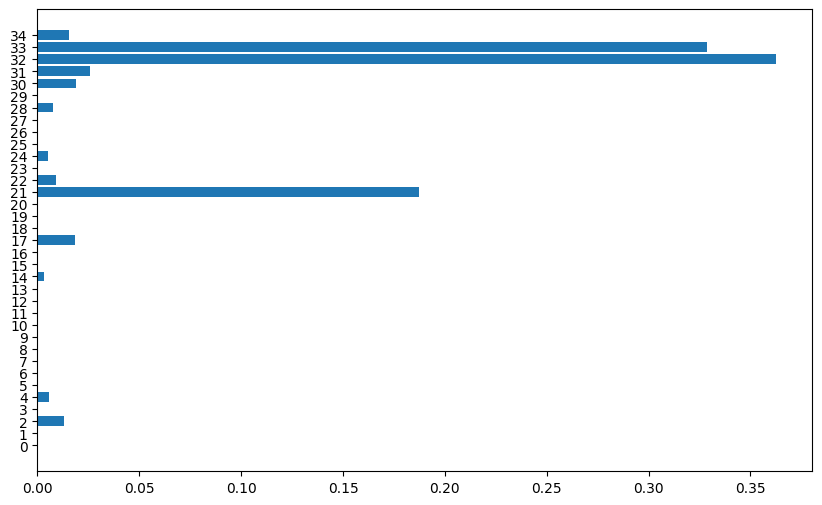

In [ ]:
import matplotlib.pyplot as plt
X = data_2023[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
# Assuming 'decision_tree' is your trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
X = data_2023[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
# Assuming 'random_forest' is your trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()


In [ ]:

# Assuming 'gradient_boosting' is your trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the models have been trained and we have their predictions
# Here are the predictions from each model you used earlier
# y_pred_decision_tree, y_pred_knn, y_pred_random_forest for the respective models

# Combine actual vs. predicted values into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Actual': y_test,
    'Decision Tree Predicted': y_pred_decision_tree,
    'KNN Predicted': y_pred_knn,
    'Random Forest Predicted': y_pred_random_forest
})

# Display the first few rows of the results DataFrame
print(results_df.head())

# Plot Actual vs Predicted for each model
plt.figure(figsize=(15, 8))

# Plot for Decision Tree
plt.subplot(3, 1, 1)
plt.plot(results_df['Actual'].values, label='Actual', color='blue')
plt.plot(results_df['Decision Tree Predicted'].values, label='Decision Tree Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted - Decision Tree')
plt.legend()

# Plot for K-Nearest Neighbors (KNN)
plt.subplot(3, 1, 2)
plt.plot(results_df['Actual'].values, label='Actual', color='blue')
plt.plot(results_df['KNN Predicted'].values, label='KNN Predicted', color='green', alpha=0.7)
plt.title('Actual vs Predicted - K-Nearest Neighbors')
plt.legend()

# Plot for Random Forest
plt.subplot(3, 1, 3)
plt.plot(results_df['Actual'].values, label='Actual', color='blue')
plt.plot(results_df['Random Forest Predicted'].values, label='Random Forest Predicted', color='orange', alpha=0.7)
plt.title('Actual vs Predicted - Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming you have predictions from each model
# y_pred_decision_tree, y_pred_knn, y_pred_random_forest for the respective models

# Combine actual vs. predicted values into a DataFrame
results_df = pd.DataFrame({
    'Actual Bags Collected (2024)': y_test,  # Actual values from the 2024 test data
    'Decision Tree Predicted': y_pred_decision_tree,  # Predicted values from Decision Tree Regressor
    'KNN Predicted': y_pred_knn,  # Predicted values from KNN Regressor
    'Random Forest Predicted': y_pred_random_forest  # Predicted values from Random Forest Regressor
})

# Display the first few rows of the table to show actual vs. predicted values
results_df.head(10)  # Adjust the number to show more rows if needed


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grids for each regression model

# 1. K-Nearest Neighbors Regressor
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 2. Decision Tree Regressor
decision_tree_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Random Forest Regressor
random_forest_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create models dictionary with parameter grids for regression
regression_models = {
    'K-Nearest Neighbors Regressor': (KNeighborsRegressor(), knn_params),
    'Decision Tree Regressor': (DecisionTreeRegressor(random_state=42), decision_tree_params),
    'Random Forest Regressor': (RandomForestRegressor(random_state=42), random_forest_params)
}

# Dictionary to store the best estimators
best_regressors = {}

# Perform hyperparameter tuning for each regression model
for model_name, (model, params) in regression_models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Store best estimator
    best_regressors[model_name] = grid_search.best_estimator_

    # Print best parameters and best cross-validation score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score (MSE) for {model_name}: {grid_search.best_score_}\n")


In [ ]:
# Evaluate each tuned model on the test data
for model_name, model in best_regressors.items():
    print(f"Evaluating {model_name} on test data...")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"{model_name} - Mean Absolute Error (MAE): {mae}")
    print(f"{model_name} - Mean Squared Error (MSE): {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")


 tuning process led to overfitting on the training data (2023), which did not generalize well to the test data (2024).

In [ ]:
import pandas as pd

# Data for the table
data = {
    "Model": ["Decision Tree", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting"],
    "Mean Squared Error (MSE)": [1729.34, 1182.69, 1126.66, 1215.80],
    "R-Squared (R²)": [-0.5094, -0.0323, 0.0166, -0.0612],
    "Key Observations": [
        "High error and negative R² indicate poor generalization on test data.",
        "Moderate error but negative R²; lacks predictive accuracy for this dataset.",
        "Lowest MSE and slightly positive R²; best balance between error and prediction capability.",
        "Similar to Random Forest but with slightly worse MSE and negative R²."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Apply styling with borders, colors, and larger font size
def highlight_rows(row):
    return ['background-color: #F0F8FF; border: 1px solid #B0C4DE' if row.name % 2 == 0
            else 'background-color: #FAEBD7; border: 1px solid #B0C4DE'] * len(row)

styled_df = (df.style
             .apply(highlight_rows, axis=1)
             .set_table_styles([
                 {'selector': 'th', 'props': [
                     ('background-color', '#4682B4'),
                     ('color', 'white'),
                     ('font-weight', 'bold'),
                     ('border', '1px solid #B0C4DE'),
                     ('font-size', '14px'),
                     ('text-align', 'center')
                 ]},
                 {'selector': 'td', 'props': [
                     ('border', '1px solid #B0C4DE'),
                     ('font-size', '13px'),
                     ('text-align', 'center')
                 ]},
                 {'selector': 'table', 'props': [
                     ('width', '100%'),
                     ('margin', '10px auto')
                 ]}
             ])
             .set_properties(**{'text-align': 'center', 'padding': '10px'})
)

# Display the styled DataFrame
styled_df


# Solution 2: Convert to a Classification Problem

To do this we can set a threshold for the number of bags collected to determine whether a donation drive is considered successful or not. This threshold can be used to convert your regression task (predicting the number of bags collected) into a classification task (predicting whether the threshold was met or not).

In [ ]:
threshold = 50  # Define your threshold here. In this case the Threshold is 50 bags
# Convert the target variable 'Donation Bags Collected' to binary classes
data_2023['Success'] = (data_2023['Donation Bags Collected'] >= threshold).astype(int)
data_2024['Success'] = (data_2024['Donation Bags Collected'] >= threshold).astype(int)


# Check for Data imbalance

In [ ]:
# Check class distribution in the 2023 training data
print("Class distribution in 2023 (training data):")
print(data_2023['Success'].value_counts(normalize=True))

# Check class distribution in the 2024 test data
print("\nClass distribution in 2024 (test data):")
print(data_2024['Success'].value_counts(normalize=True))




In [ ]:
# Plotting the distribution for visual inspection
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Plot for 2023 data
plt.subplot(1, 2, 1)
data_2023['Success'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in 2023 Data')
plt.xlabel('Success (1=Successful, 0=Not Successful)')
plt.ylabel('Frequency')

# Plot for 2024 data
plt.subplot(1, 2, 2)
data_2024['Success'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in 2024 Data')
plt.xlabel('Success (1=Successful, 0=Not Successful)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Consider reducing your threshold for better balance. Try #40, #30...etc

In [ ]:
import matplotlib.pyplot as plt

# List of thresholds to test
thresholds = [50, 40, 30, 20]  # Add or adjust thresholds as needed

# Iterate over each threshold and plot class distributions
for threshold in thresholds:
    # Convert 'Donation Bags Collected' to binary classes based on the threshold
    data_2023['Success'] = (data_2023['Donation Bags Collected'] >= threshold).astype(int)
    data_2024['Success'] = (data_2024['Donation Bags Collected'] >= threshold).astype(int)

    # Plot class distribution for 2023 and 2024 data
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 2023 data
    data_2023['Success'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[0])
    axes[0].set_title(f'Class Distribution in 2023 Data (Threshold: {threshold})')
    axes[0].set_xlabel('Success (1=Successful, 0=Not Successful)')
    axes[0].set_ylabel('Frequency')

    # 2024 data
    data_2024['Success'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[1])
    axes[1].set_title(f'Class Distribution in 2024 Data (Threshold: {threshold})')
    axes[1].set_xlabel('Success (1=Successful, 0=Not Successful)')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define feature matrix X and target variable y for training (2023 data)
X_train = data_2023[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
y_train = data_2023['Success']  # 'Success' column based on the threshold of 30

# Define feature matrix X and target variable y for testing (2024 data)
X_test = data_2024[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
y_test = data_2024['Success']  # 'Success' column based on the threshold of 30


In [ ]:
# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare Models

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)



In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))



In [ ]:
# Optionally, you can print more evaluation metrics like precision, recall, and F1-score
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))



In [ ]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))



In [ ]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

In [ ]:
import pandas as pd

# Assuming you have predictions from each model
# y_pred_decision_tree, y_pred_knn, y_pred_random_forest for the respective models

# Combine actual vs. predicted values into a DataFrame
results_df = pd.DataFrame({
    'Actual Bags Collected (2024)': y_test,  # Actual values from the 2024 test data
    'Decision Tree Predicted': y_pred_decision_tree,  # Predicted values from Decision Tree Regressor
    'KNN Predicted': y_pred_knn,  # Predicted values from KNN Regressor
    'Random Forest Predicted': y_pred_random_forest  # Predicted values from Random Forest Regressor
})

# Display the first few rows of the table to show actual vs. predicted values
results_df.head(10)  # Adjust the number to show more rows if needed


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to get the count of correct and incorrect predictions
def get_correct_incorrect_counts(y_true, y_pred):
    correct = np.sum(y_true == y_pred)  # Count where predictions match actual
    incorrect = np.sum(y_true != y_pred)  # Count where predictions do not match actual
    return correct, incorrect

# Calculate correct and incorrect counts for each model
dt_correct, dt_incorrect = get_correct_incorrect_counts(y_test, y_pred_decision_tree)
knn_correct, knn_incorrect = get_correct_incorrect_counts(y_test, y_pred_knn)
rf_correct, rf_incorrect = get_correct_incorrect_counts(y_test, y_pred_random_forest)

# Data for the stacked bar chart
labels = ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest']
correct_counts = [dt_correct, knn_correct, rf_correct]
incorrect_counts = [dt_incorrect, knn_incorrect, rf_incorrect]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, correct_counts, label='Correct', color='lightgreen')
ax.bar(labels, incorrect_counts, bottom=correct_counts, label='Incorrect', color='salmon')
ax.set_ylabel('Count')
ax.set_title('Correct vs Incorrect Predictions for Each Model')
ax.legend()

plt.show()


*Which model performed best?*

Random Forest model performed the best among the three models. Here’s a breakdown of why:

Accuracy: Random Forest achieved the highest accuracy at 0.7427, compared to 0.7181 for K-Nearest Neighbors (KNN) and 0.7114 for the Decision Tree.

Classification Report (F1-Score):

The F1-score for the Random Forest model is higher, especially for class 1 (successful) with an F1-score of 0.82.
For the other models, KNN has an F1-score of 0.79 for class 1, and the Decision Tree has an F1-score of 0.78 for class 1.
Precision and Recall for Class 0 (Not Successful):

Random Forest has better precision and recall for class 0 than the other models, indicating it handles the minority class (not successful) somewhat better than KNN and Decision Tree.
This is particularly valuable when working with imbalanced data, as it shows the model can correctly identify both classes.
Summary
Overall, Random Forest is the best-performing model, as it achieved the highest accuracy, precision, recall, and F1-score across both classes. This model should be the preferred choice for predicting the success of donation drives based on your data.








# Save the best performing model

In [ ]:


# Assuming 'random_forest_classifier' is your best trained Random Forest Classifier model
model = random_forest  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


# Determine Feature Importance- Classification Models

Decision Tree

In [ ]:
X = data_2023[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
# Assuming 'decision_tree' is your trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


Random Forest

In [ ]:

# Assuming 'random_forest' is your trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Gradient Boost

In [ ]:

# Assuming 'gradient_boosting' is your trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()


In [ ]:
import pandas as pd

# Data for the model comparison table
data = {
    "Model": ["K-Nearest Neighbors", "Decision Tree", "Random Forest"],
    "Accuracy": ["71.81%", "71.14%", "74.27%"],
    "Precision (Class 1)": ["83%", "84%", "83%"],
    "Recall (Class 1)": ["76%", "74%", "81%"],
    "F1-Score": ["79%", "78%", "82%"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define a function to style rows
def highlight_rows(row):
    return ['background-color: #E3F2FD; font-size: 14px; font-weight: bold; color: #0D47A1; border: 1px solid #BBDEFB' if row.name % 2 == 0
            else 'background-color: #BBDEFB; font-size: 14px; font-weight: bold; color: #0D47A1; border: 1px solid #0D47A1'] * len(row)

# Apply styling with alternating row colors, bold text, larger font, and centered headers
styled_df = (df.style
             .apply(highlight_rows, axis=1)
             .set_table_styles([
                 {'selector': 'th', 'props': [
                     ('background-color', '#0D47A1'),
                     ('color', 'white'),
                     ('font-weight', 'bold'),
                     ('font-size', '16px'),
                     ('border', '1px solid #0D47A1'),
                     ('text-align', 'center')
                 ]},
                 {'selector': 'td', 'props': [
                     ('border', '1px solid #0D47A1'),
                     ('font-size', '14px'),
                     ('text-align', 'center')
                 ]},
                 {'selector': 'table', 'props': [
                     ('width', '100%'),
                     ('margin', '20px auto')
                 ]}
             ])
             .set_properties(**{'text-align': 'center', 'padding': '10px'})
)

# Display the styled DataFrame
styled_df


## **K means clustering**

In [ ]:
data_2024.head()

In [ ]:
import pandas as pd

# Load the 2024 dataset
data_2024 = pd.read_csv('cleaned_data_2024.csv')

# Remove " Ward" from the end of each entry in the 'Ward' column
data_2024['Ward'] = data_2024['Ward'].str.replace(' Ward', '', regex=False)

# Display the first few rows to confirm the changes
print(data_2024[['Ward']].head())

In [ ]:
data_neighbourhood = pd.read_csv("Neighbourhood_Boundaries___2019_20241106.csv")

In [ ]:
data_neighbourhood.columns

In [ ]:
data_neighbourhood['geom'].unique()

In [ ]:
data_neighbourhood['Friendly Name'].unique()

In [ ]:
data_2024['Ward'].unique()

In [ ]:
# Optional: Create a manual mapping for neighborhoods that don't match directly
manual_mapping = {
    'Mill Creek YSA': 'Mill Creek Ravine South',  # Example mapping
    'Whitemud Creek YSA': 'Whitemud Creek Ravine South',
    'Woodbend': 'Woodcroft',  # Update based on closest matches
    'Clareview': 'Clareview Town Centre',
    # Add other mappings as needed
}

# Apply the manual mapping to the Ward column in 2024 data
data_2024['Ward'] = data_2024['Ward'].replace(manual_mapping)

# Merge on the Ward/Neighbourhood columns
merged_data = pd.merge(data_2024, data_neighbourhood, left_on='Ward', right_on='Friendly Name', how='left')

# Verify the merge
print("Number of unmatched records:", merged_data['Friendly Name'].isnull().sum())
print(merged_data.head())

In [ ]:
pip install geopandas


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Convert 'geom' column from WKT format to Shapely geometry
data_neighbourhood['geometry'] = data_neighbourhood['geom'].apply(wkt.loads)

# Convert to GeoDataFrame
gdf_neighbourhood = gpd.GeoDataFrame(data_neighbourhood, geometry='geometry')

# Calculate the centroid of each neighborhood
gdf_neighbourhood['centroid'] = gdf_neighbourhood.geometry.centroid

# Extract latitude and longitude from the centroid
gdf_neighbourhood['latitude'] = gdf_neighbourhood['centroid'].y
gdf_neighbourhood['longitude'] = gdf_neighbourhood['centroid'].x

# Display the first few rows to confirm
print(gdf_neighbourhood[['Friendly Name', 'latitude', 'longitude']].head())

In [ ]:
# Rename columns to align for merging (if needed)
data_2024.rename(columns={'Ward': 'Friendly Name'}, inplace=True)

# Merge 2024 data with neighborhood centroids
merged_data = pd.merge(data_2024, gdf_neighbourhood[['Friendly Name', 'latitude', 'longitude']],
                       on='Friendly Name', how='left')

# Check for unmatched records
unmatched = merged_data[merged_data['latitude'].isnull()]
print(f"Number of unmatched records: {len(unmatched)}")

# Display first few rows of merged data
print(merged_data.tail())

In [ ]:
print(merged_data.columns)


In [ ]:
# Aggregate donation bags and other relevant columns by neighborhood
aggregated_data = merged_data.groupby('Friendly Name', as_index=False).agg({
    'Donation Bags Collected': 'sum',  # Sum up donation bags
    'latitude': 'first',  # Take the first latitude for each neighborhood
    'longitude': 'first',  # Take the first longitude for each neighborhood
    'No of Adult Volunteers': 'sum',  # Optional: sum of adult volunteers
    'No of Youth Volunteers': 'sum'   # Optional: sum of youth volunteers
})

# Display the first few rows to verify
print(aggregated_data.head())


In [ ]:
# Remove rows where latitude or longitude is NaN
aggregated_data = aggregated_data.dropna(subset=['latitude', 'longitude'])

In [ ]:
import folium

# Initialize the map centered around Edmonton
edmonton_map = folium.Map(location=[53.5461, -113.4938], zoom_start=11)

# Add markers for each neighborhood, scaling the radius by the total donation bags collected
for idx, row in aggregated_data.iterrows():
    # Popup and tooltip texts
    popup_text = (f"Neighborhood: {row['Friendly Name']}<br>"
                  f"Total Donation Bags Collected: {row['Donation Bags Collected']}<br>"
                  f"Adult Volunteers: {row['No of Adult Volunteers']}<br>"
                  f"Youth Volunteers: {row['No of Youth Volunteers']}")
    tooltip_text = f"{row['Friendly Name']}: {row['Donation Bags Collected']} bags"

    # Dynamic radius based on the total donation bags collected
    radius = max(5, min(row['Donation Bags Collected'] / 10, 20))  # Adjust scale as needed

    # Add a circle marker with dynamic radius and tooltip
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,  # Dynamic size based on total donation bags
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=popup_text,
        tooltip=tooltip_text
    ).add_to(edmonton_map)

# Display the map
edmonton_map


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure no NaN values in latitude and longitude
data_for_clustering = aggregated_data.dropna(subset=['latitude', 'longitude'])
# Standardize latitude and longitude for better clustering performance
scaler = StandardScaler()
data_for_clustering[['latitude_scaled', 'longitude_scaled']] = scaler.fit_transform(data_for_clustering[['latitude', 'longitude']])

In [ ]:
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 10)  # Test values for k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering[['latitude_scaled', 'longitude_scaled']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 10)  # Test values for k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering[['latitude_scaled', 'longitude_scaled']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
optimal_k = 4  # Replace with the chosen number from the Elbow Method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['latitude_scaled', 'longitude_scaled']])


In [ ]:
# Initialize the map
cluster_map = folium.Map(location=[53.5461, -113.4938], zoom_start=11)

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightgreen', 'darkblue', 'pink', 'cadetblue']

# Add circle markers for each neighborhood based on clusters
for idx, row in data_for_clustering.iterrows():
    tooltip_text = f"{row['Friendly Name']}: {row['Donation Bags Collected']} bags, Cluster {row['Cluster']}"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        color=colors[row['Cluster'] % len(colors)],  # Cycle colors if clusters exceed color list
        fill=True,
        fill_color=colors[row['Cluster'] % len(colors)],
        fill_opacity=0.7,
        tooltip=tooltip_text
    ).add_to(cluster_map)

# Display the map
cluster_map


In [ ]:
import matplotlib.pyplot as plt

# Plotting the clusters on a scatter plot with latitude and longitude
plt.figure(figsize=(10, 6))
for cluster in data_for_clustering['Cluster'].unique():
    clustered_data = data_for_clustering[data_for_clustering['Cluster'] == cluster]
    plt.scatter(clustered_data['longitude'], clustered_data['latitude'], label=f"Cluster {cluster}")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Neighborhood Clusters by K-Means")
plt.legend()
plt.show()


In [ ]:
# Count the number of neighborhoods in each cluster
cluster_counts = data_for_clustering['Cluster'].value_counts()

# Plotting the counts per cluster
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Number of Neighborhoods")
plt.title("Number of Neighborhoods in Each Cluster")
plt.show()


In [ ]:
import seaborn as sns

# Box plot of donation bags by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Donation Bags Collected', data=data_for_clustering, palette="Set3")
plt.xlabel("Cluster")
plt.ylabel("Donation Bags Collected")
plt.title("Distribution of Donation Bags Collected per Cluster")
plt.show()


In [ ]:
# Group neighborhoods by cluster and list them
clusters_summary = data_for_clustering.groupby('Cluster')['Friendly Name'].apply(list).reset_index()
clusters_summary.columns = ['Cluster', 'Neighborhoods']

# Display the list of neighborhoods in each cluster
for idx, row in clusters_summary.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(", ".join(row['Neighborhoods']))
    print("\n")


In [ ]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop over each cluster to plot the points and add labels
for cluster in data_for_clustering['Cluster'].unique():
    clustered_data = data_for_clustering[data_for_clustering['Cluster'] == cluster]

    # Scatter plot for the cluster
    plt.scatter(clustered_data['longitude'], clustered_data['latitude'], label=f"Cluster {cluster}", s=100)

    # Annotate each point with the neighborhood name
    for idx, row in clustered_data.iterrows():
        plt.annotate(row['Friendly Name'],
                     (row['longitude'], row['latitude']),
                     textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Adding titles and labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Neighborhood Clusters with Labels")
plt.legend()
plt.show()


In [ ]:
data_for_clustering_extended = merged_data[['latitude', 'longitude', 'Donation Bags Collected', 'Friendly Name']].dropna()

# Apply KMeans clustering with latitude, longitude, and donation bags collected as features
kmeans_extended = KMeans(n_clusters=4, random_state=42)
data_for_clustering_extended['Cluster'] = kmeans_extended.fit_predict(data_for_clustering_extended[['latitude', 'longitude', 'Donation Bags Collected']])

# Plot the clusters with donation bags considered
plt.figure(figsize=(12, 8))
for cluster in data_for_clustering_extended['Cluster'].unique():
    clustered_data = data_for_clustering_extended[data_for_clustering_extended['Cluster'] == cluster]
    plt.scatter(clustered_data['longitude'], clustered_data['latitude'],
                s=clustered_data['Donation Bags Collected']*0.2,  # Dynamic size based on donation bags
                label=f"Cluster {cluster}", alpha=0.6)
    # Annotate each point with neighborhood name
    for idx, row in clustered_data.iterrows():
        plt.annotate(row['Friendly Name'],
                     (row['longitude'], row['latitude']),
                     textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Neighborhood Clusters by Latitude, Longitude, and Donation Bags Collected")
plt.legend()
plt.show()